# Lab 2: Series de Fourier i síntesi de so

## Enginyeria Acústica 2022

Genís Plaja - genis.plaja@upf.edu - Despatx 55.312 (Edifici Tànger)

**OCTUBRE 2022**

### NOTE: Although we provide the exercise indications in English, an important part of the Lab materials are written in Catalan to better comply with the theory materials. For language-related enquires please send an email to genis.plaja@upf.edu. However, please note that the Labs can be completed and submitted using whether Catalan or English. I will return the feedback using the language you have chosen to complete the labs.


# Instruccions d'entrega

Igual que en la pràctica anterior, haureu d'entregar aquesta mateixa *jupyter notebook* amb totes les respostes.

__Consideracions__:
* El codi que escriviu ha d'estar comentat quan sigui necessari.
* **TOTES LES RESPOSTES HAN D'ESTAR JUTIFICADES.** Encara que no es demani un *report* en PDF, cal que tots els passos estiguin explicats. No fer-ho restarà punts de la pràctica.
* No adjunteu arxius d'àudio generats amb la notebook. Els arxius resultat dels exercicis s'han de poder generar només executant el codi.
* Això sí: **ADJUNTEU SISPLAU L'ARXIU D'ÀUDIO QUE UTILITZEU PER A L'ÚLTIM EXERCICI! SI NO, NO EL PODRÉ EXECUTAR.**
* Recordeu que podeu penjar arxius al Collab!

__[ENG] Considerations__:
* Comment the code when needed.
* **ALL RESPONSES MUST BE JUSTIFIED.** There is no need to submit a *report* but you need to explain your 
* **PLEASE DO NOT SEND YOUR GENERATED AUDIOS BUT DO SEND THE EXTERNAL AUDIO FILES YOU USE TO COMPLETE YOUR LAB. OTHERWISE I WON'T BE ABLE TO EXECUTE IT.**
* You can upload files to Collab!

__Puntuació__:
* Exercici 1: 2 punts
* Exercici 2: 2 punts
* Exercici 3: 2 punts
* Exercici 4: 4 punts

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import soundfile
import IPython.display as ipd

## Exercici 1: Series de Fourier

A partir de la funció quadrada següent:


$$
f(t) = \left\{
        \begin{array}{ll}
            1 & \quad 0 < t \leq \frac{T}{2} \\
            -1 & \quad \frac{T}{2} < t \leq T
        \end{array}
    \right.
$$

La descomposició en series de Fourier d'aquest senyal ve donada per:
$$
f(t) \approx \sum_{n=1}^{\infty}\frac{4}{(2n-1)\pi}*sin(\frac{(2n-1)2\pi t}{T})
$$

La funció quadrada és una funció senar, i per tant, tindrà només els harmònics senars (per això el 2n-1). En la descomposició de Fourier, aquesta funció només tindrà els coeficients $b_n$ ($a_n$ = 0). En aquest document trobareu la derivació d'aquesta descomposició: https://drive.google.com/file/d/1qTY-vYpgUsL4fBDE1aoZ3C6PlxG7CBzp/view?usp=sharing.

Aquesta expressió ens indica que si sumem tot el conjunt (infinit!) de sinusoïdes, podem construir l'ona quadrada. 
Com que no podem generar un nombre infinit de sinusoïdes, a la pràctica en generarem un nombre finit, i aconseguirem una aproximació a l'ona quadrada. Com més sinusoïdes posem, més ens acostarem a la funció "real".

Si analitzem bé l'expressió de dins del sumatori, veurem que es tracta d'una sinusoïde amb una freqüència de $\frac{(2n-1)}{T}$ Hz (o $\frac{(2n-1)2\pi}{T}$ rad/s) multiplicada per un valor d'amplitud $\frac{4}{(2n-1)\pi}$. Tenint en compte això, i utilitzant un rang de valors de *n*, podem saber les amplituds i les freqüències de les sinusoïdes que formen el senyal quadrat.

<div class="alert alert-block alert-success">
    
<b>Crea una funció `fourier()` generi una serie de sinusoides que s'aproximi a la funció quadrada seguint aquests passos:</b>

1. Utilitza un rang de _t_ equivalent a dos períodes, i.e. 2T. Hauràs d'escollir el valor de la freqüència/període, per exemple $T=2\pi$.

2. Com que computacionalment no és factible crear una serie infinita, generarem una serie per *n* de 1 a 5 utilitzant un _for loop_.

3. A cada iteració utilitzem la funció `singen()` de la P1 per generar una sinusoide per cada _n_.

4. A cada iteració sumarem la nova sinusoide a les generades anteriorment.

5. Fem una gràfica de les 5 sinusoides individuals i de la funció f(t) obtinguda a partir de la suma. Utilitzeu _subplots_ de Matplotlib.
    
<br>
    
<b>[ENG] Create a function `fourier()` that generates a series of sinusoids that approximate a squared functions following these steps:</b>

1. Use a range of _t_ equivalent to two periods, i.e. 2T. You need to chose the freq/period value, e.g. $T=2\pi$.

2. Since it is not possible to create an infinite operation, we will use a particular range, e.g. 1 to 5 using a _for loop_.

3. At each iteration, use `singen()` to generate a sinusoid for each _n_.

4. At each iteration sum the generated sinusoid to the previous result.

5. Create a plot with the intermediate sinewave and the final results using matplotlib.
    
    
</div>

In [30]:
def singen(t,f,A,phi):

    y = A * np.sin(2*np.pi*f*t + phi)

    return y

In [31]:
def fourier(n, f_0, Ts):
  phi = 0
  dur = 2/f_0 # Dos períodes
  num = round(dur/Ts)
  y_final = np.zeros(num)
  t = np.arange(0,dur,Ts)
  for i in range (1,n+1):
    A = 4/((2*i - 1)*np.pi)
    f = f_0*(2*i - 1)
    y = singen(t, f, A, phi)
    y_final += y
  return t,y_final

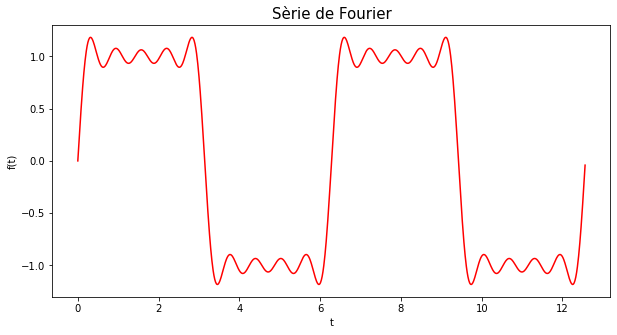

In [32]:
n = 5
f_0 = 1/(2*np.pi) # Període fonamental T_0 = 2*pi
Ts = 0.01
t,y = fourier(n, f_0, Ts)

plt.figure(figsize=(10,5))
plt.plot(t,y,'r')
plt.title("Sèrie de Fourier", fontsize=15)
plt.xlabel("t"), plt.ylabel("f(t)")
plt.show()

## Exercici 2
<div class="alert alert-block alert-success">
   
<b>a) Crea una funció `stringGenerator()` que simuli un so generat per una corda amb tensió. Per modelar el comportament de la corda, assumim que la funció rep com a paràmetres d'entrada les variables L (longitud de la corda), T (tensió de la corda en Newtons) i *dur* (durada del so en segons), i retorna un vector amb el senyal.</b>

Recordeu com calculem la freqüència de cadascun dels harmònics:
$$
f_n = \frac{1}{\lambda_n}\sqrt{\frac{T}{d}} = \frac{n}{2L}\sqrt{\frac{T}{d}} = nf_1
$$

I tingueu en compte aquestes indicacions:
    
    
* La corda ha de vibrar sempre amb una freqüència fonamental més 8 harmònics consecutius (n=8).
* L'amplitud de cada harmònic serà la meitat que la de l'anterior.
* La massa per unitat de longitud (densitat lineal) de la corda serà 0.0252 kg/m.
* Per generar el vector de temps, penseu en una freqüència de mostreig clàssica en àudio com 16000 o 22050 Hz.

Podeu utilitzar la funció `singen()` de la pràctica anterior per generar cadascun dels harmònics.
    
    
<br>
    
<b>[ENG] a) Create a function `stringGenerator()` that simulates a sound generated for a tense string. To model the string behaviour, we assume that the functions receives as input the variables L (string length) and T (tension in Newtons, and *dur* (duration of the sound in seconds), and returns the output signal.</b>

How to compute the harmonics:
$$
f_n = \frac{1}{\lambda_n}\sqrt{\frac{T}{d}} = \frac{n}{2L}\sqrt{\frac{T}{d}} = nf_1
$$

And also take into account that:
    
 
* The string must vibrate with the fundamental frequency plus the 8 consecutive harmonics (n=8).
* The amplitude of each harmonic is half the previous one.
* The lineal denisty of the string is 0.0252 kg/m.
* Use a sampling frequency of 16000 o 22050 Hz to generate the time vector.
    
    
**NOTE: CAREFUL WITH THE PARENTHESES!!**

</div>

In [33]:
def stringGenerator(L,T,d,dur,fs):
  f_0 = (1/(2*L))*np.sqrt(T/d) # Freqüència fonamental del primer harmònic
  A = 1
  phi = 0
  t = np.arange(0,dur,1/fs)
  y = singen(t,f_0,A,phi)
  n = 8 # Fixem el nombre d'harmònics
  for i in range (2, n+1):
    A /= 2
    f = i * f_0 # Actualització de la freqüència
    y += singen(t,f,A,phi)
  return y

<div class="alert alert-block alert-success">

__b) Crida la funció amb els paràmetres que decideixis i guarda el resultat en una variable.__
    
<br>
    
__[ENG] b) Run the function with your own parameters and store the result in a variable.__

</div>

In [34]:
L = 0.5
T = 300
d = 0.0252
dur = 2
fs = 22500
x = stringGenerator(L,T,d,dur,fs)

<div class="alert alert-block alert-success">

__c) Escolta la senyal resultant fent servir la funció `IPython.display.Audio()`. Segueix aquest exemple, on `x` és el senyal generat i `fs` és la freqüència de mostreig. Recordeu que heu de fer servir la mateixa que per generar el senyal.__
    
<br>
    
__[ENG] c) Listen to the resulting signal using the function `IPython.display.Audio()`.__

</div>

In [35]:
# Reproduir audio
ipd.Audio(data=x, rate=fs)

<div class="alert alert-block alert-success">

__d) Prova diferents combinacions de paràmetres (almenys tres diferents) i explica com afecten la tensió i la longitud de la corda al so resultant. Utilitza el codi de l'apartat anterior per poder escoltar tots els sons resultants, indicant els paràmetres en cada cas. Per fer-ho més fàcil, pots posar cada exemple en una cel·la diferent.__
    
<br>
    
__[ENG] d) Experiment with at least three different string tension and length parameters and comment the results. Use the code from previous exercise to listen to the generated tone. Use a cell for each experiment.__

</div>

In [36]:
T = 200 # Reduïm tensió

y1 = stringGenerator(L,T,d,dur,fs)

ipd.Audio(data=y1, rate=fs)

EXPLICACIÓ: Si disminuïm la tensió, la freqüència dels harmònics també disminueix i resulta en un so més greu. Mirant la fórmula de la freqüència veiem que té tot el sentit. Si l'augmentéssim, obtindríem un so més agut.

In [37]:
L = 1 # Doblem la longitud de la corda
T = 300 # Tensió original

y2 = stringGenerator(L,T,d,dur,fs)

ipd.Audio(data=y2, rate=fs)

EXPLICACIÓ: Si doblem la longitud de la corda també obtenim un so més greu ja que estem reduïnt la freqüència. A banda d'això, com que la freqüència està reduïda a la meitat i és múltiple de la freqüència de la secció c), la nota és la mateixa nota però una octava més avall.

In [38]:
L = 0.25 # Reduïm longitud de corda
T = 300 # Tensió original

y3 = stringGenerator(L,T,d,dur,fs)

ipd.Audio(data=y3, rate=fs)

EXPLICACIÓ: De la mateix manera, si reduïm la longitud de la corda a la meitat respecte l'original, obtenim la mateixa nota però una octava més amunt (major freqüència).

In [39]:
L = 1 # Augmentem tensió
T = 4*300 # Augmentem longitud

y4 = stringGenerator(L,T,d,dur,fs)

ipd.Audio(data=y4, rate=fs)

EXPLICACIÓ: Per acabar, hem comprovat que si doblem la longitud i multipliquem per 4 la tensió, és com si no estiguéssim modificant la freqüència original, per tant surt un so exactament igual que en l'apartat c).

<div class="alert alert-block alert-success">

__e) Guarda en un arxiu d'àudio un dels exemples del so generat, indicant els valors utilitzats en el nom de l'arxiu, per exemple: *T56_L300_dur_3.wav*.__
    
<br>
    
__[ENG] e) Write into a file the generated audio examples, indicating the used values in the filename:er exemple: *T56_L300_dur_3.wav*.__


</div>

In [40]:
soundfile.write('T300_L0.5_dur_2.wav', x, fs)
soundfile.write('T200_L0.5_dur_2.wav', y1, fs)
soundfile.write('T300_L1_dur_2.wav', y2, fs)
soundfile.write('T300_L0.25_dur_2.wav', y3, fs)
soundfile.write('T1200_L1_dur_2.wav', y4, fs)

<div class="alert alert-block alert-success">

__f) Què passa si variem la massa de la corda, mantenint L i T constants? Crea la funció `stringGenerator2()` on la massa també sigui un paràmetre d'entrada i fes proves amb 3 valors diferents de massa. Utilitza el `display.Audio()` dels apartats anteriors per escoltar els resultats. Recorda que la massa no equival a la densitat lineal (d), sinó que serveix per calcular-la.__
    
<br>
    
__[ENG] f) What happens if we change the mass of the string while maintaining L and T? Create `stringGenerator2()` where the mass is also an input parameter and experiment with the three different inputs. Listen to the experiments. Note that the mass is not equal to lineal density but it is useful to compute it.__ 
   
</div>

In [41]:
def stringGenerator2(L,T,m,dur,fs):
  d = m/L
  f_1 = (1/(2*L))*np.sqrt(T/d) # Freqüència del primer harmònic
  A = 1
  phi = 0
  t = np.arange(0,dur,1/fs)
  y = singen(t,f_1,A,phi)
  n = 8
  for i in range (2, n+1):
    A /= 2
    f = i * f_1 # Actualització de la freqüència
    y += singen(t,f,A,phi)

  return y

In [42]:
L = 0.5
T = 500
m = 0.01
x1 = stringGenerator2(L,T,m,dur,fs)

ipd.Audio(data=x1, rate=fs)

In [43]:
m = 0.001 # Reduïm la massa
x1 = stringGenerator2(L,T,m,dur,fs)

ipd.Audio(data=x1, rate=fs)

In [44]:
m = 0.1 # Augemntem la massa
x1 = stringGenerator2(L,T,m,dur,fs)

ipd.Audio(data=x1, rate=fs)

EXPLICACIÓ: Veiem que la massa és inversament proporcional a la freqüència. És a dir, si disminuïm el seu valor obtenim una major freqüència i un so més agut, però si l'augmentem obtenim una freqüència més petita i un so més greu.

## Exercici 3

La **Fast Fourier Transform (FFT)** és una implementació eficient de la transformada de Fourier que s'utilitza en el processament de senyal. Utilitzant la funció `fft()` de la llibreria NumPy podem calcular i visualitzar la magnitud de la transformada de Fourier. 

Per exemple: si tenim un senyal **xx** en el domini temporal, i.e. valors d'amplitud, i volem visualitzar-ne les components espectrals (domini freqüencial), podem utilitzar el següent codi:

(Text(0.5, 0, 'Freqüència (Hz)'), Text(0, 0.5, 'Energia'))

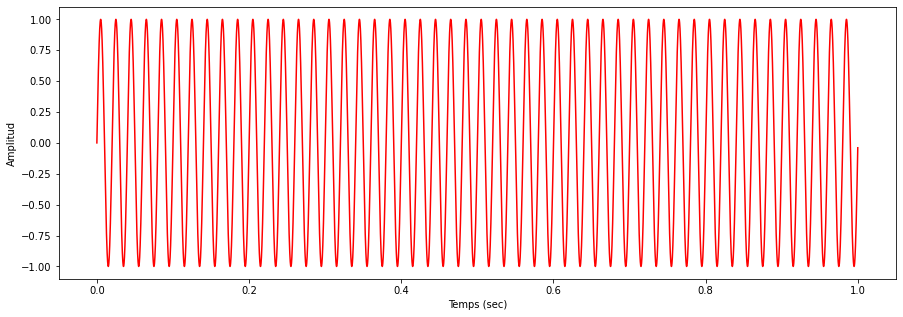

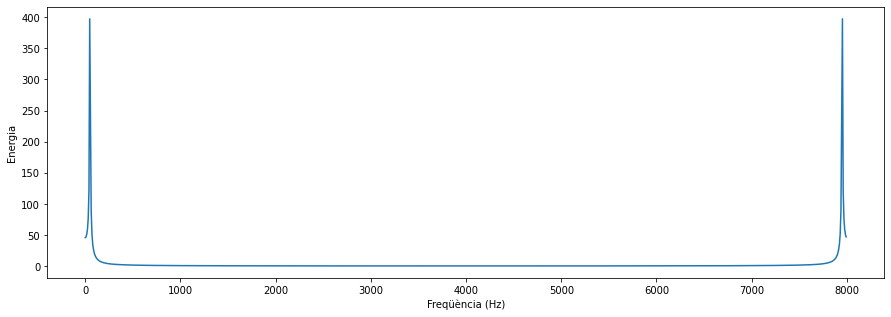

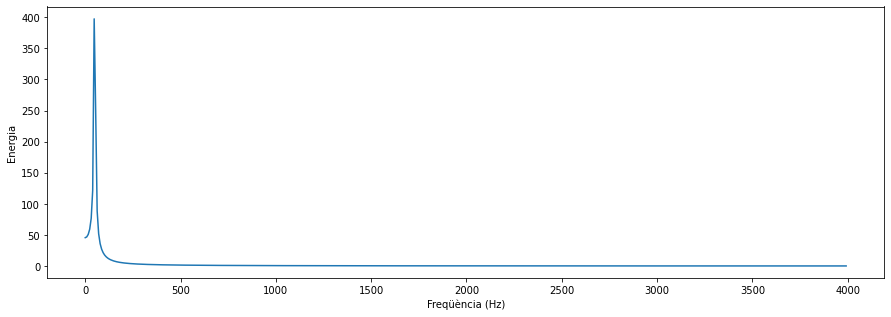

In [45]:
fs = 8000.0
Nfft = 1024 # definim la mida que volem per la FFT
tt = np.arange(0, 1, 1.0/fs)
f = 50
xx = np.sin(2 * np.pi * f * tt)

plt.figure(figsize=(15,5))
plt.plot(tt, xx, 'r'), plt.xlabel('Temps (sec)'), plt.ylabel('Amplitud')

# guardem a zz la magnitud de la FFT
zz = np.abs(np.fft.fft(xx, n=Nfft))

# creem una figura nova
plt.figure(figsize=(15,5))

# Generem un vector per tenir l'eix de freqüències. Recordeu que les freqüències d'aquest eix van de 0 
# a la freqüència de mostreig del senyal, en passos de fs/Nfft.
xf = np.arange(0, fs, fs/float(Nfft))

plt.plot(xf, zz) # fem el plot de l'espectre
plt.xlabel('Freqüència (Hz)'), plt.ylabel('Energia')

# normalment ens interessa només la meitat de l'espectre (és simètric)
plt.figure(figsize=(15,5))
plt.plot(xf[:int(Nfft/2)], zz[:int(Nfft/2)])
plt.xlabel('Freqüència (Hz)'), plt.ylabel('Energia')


<div class="alert alert-block alert-success">

__a) Utilitzant el codi de l'exercici anterior (`stringGenerator()`) genera un senyal que simuli la nota Mi de la sisena corda d'una guitarra (mi greu). Si voleu experimentar, podeu trobar característiques de diferents guitarres aquí: https://courses.physics.illinois.edu/phys406/sp2017/Student_Projects/Fall00/DAchilles/Guitar_String_Tension_Experiment.pdf. Alternativament, podeu utilitzar:__

* densitat lineal (d) = 5.9e-3 kg/m
* longitud (L) = 66 cm
* tensió (T) = 69.97 N

__A quina freqüència vibrarà aquesta corda?__
    
    
<br>
    
__[ENG] a) Using the code from previous exercise (`stringGenerator()`) generate a signal that simulates the low E string of a guitar. Experiment with different guitar characteristics here: https://courses.physics.illinois.edu/phys406/sp2017/Student_Projects/Fall00/DAchilles/Guitar_String_Tension_Experiment.pdf. These would be default parameters:__

* lineal density (d) = 5.9e-3 kg/m
* length (L) = 66 cm
* tension (T) = 69.97 N

__At what frequency will this string vibrate?__

</div>

RESPOSTA: La freqüència fonamental a la qual vibrarà la corda és:
$$
f_1 = \frac{1}{\lambda_1}\sqrt{\frac{T}{d}} = \frac{1}{2L}\sqrt{\frac{T}{d}} = \frac{1}{2*0.66}\sqrt{\frac{69.97}{5.9*10^{-3}}} \simeq 82.5 Hz
$$

In [46]:
L = 0.66
T = 69.97
d = 0.0059
dur = 2
fs = 22500
x = stringGenerator(L,T,d,dur,fs)

ipd.Audio(data=x, rate=fs)

<div class="alert alert-block alert-success">

__b) Crea una funció `FFTvisualize(xx, Nfft, fs)` per visualitzar l'espectre del senyal generat amb la funció de l'apartat anterior (xx serà el senyal en el domini temporal i Nfft la mida de la FFT). Fes un subplot on hi hagi diferents rangs de l'eix x per veure amb més o menys detall els pics de l'espectre.__ Pots utilitzar `plt.xlim()` per canviar el segment d'eix x que vols veure.
    
<br>
    
__[ENG] b) Createa function `FFTvisualize(xx, Nfft, fs)` to visualize the spectrum of the signal generated with the previous exercise (xx will be the signal in the temporal domain and Nfft the FFT size). Use `plt.xlim()` to zoom in to different parts of the plot and explain what you see.__

</div>

In [47]:
def FFTvisualize(xx, Nfft, fs, title):
  plt.figure(figsize=(15,5))
  zz = np.abs(np.fft.fft(xx, n=Nfft))
  xf = np.arange(0, fs, fs/float(Nfft))
  plt.plot(xf, zz)
  plt.title(title, fontsize=15)
  plt.xlabel('Freqüència (Hz)'), plt.ylabel('Energia')
  plt.xlim(0,fs/2) # Per visualitzar només la primera meitat

  return zz,xf

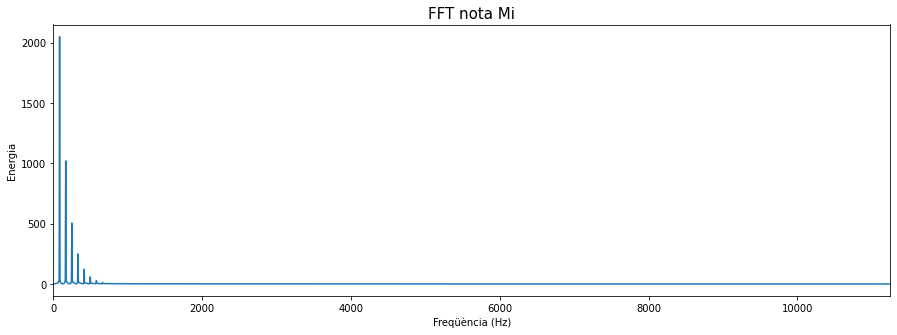

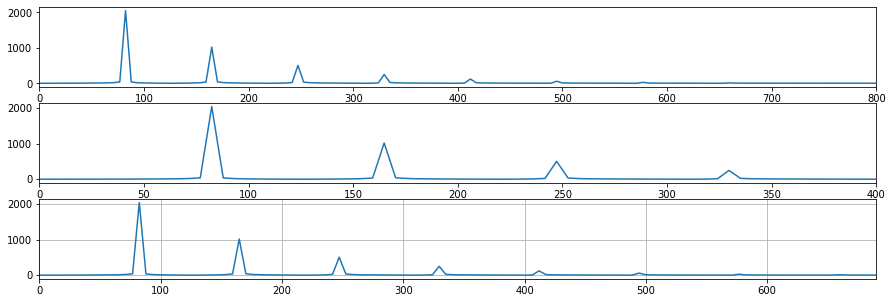

In [48]:
zz,xf = FFTvisualize(x, Nfft=4096, fs=22500, title='FFT nota Mi')

fig, (p1, p2, p3) = plt.subplots(3, figsize=(15,5))

p1.plot(xf, zz)
p1.set_xlim(0,800)
p2.plot(xf, zz)
p2.set_xlim(0,400)
p3.plot(xf, zz)
p3.set_xlim(0,690)
plt.grid()

<div class="alert alert-block alert-success">

__c) Escriu els valors d'amplitud i freqüència que tenen les components que observes a la imatge de l'espectre. És coherent amb el que has implementat a l'exercici anterior? i.e., la contribució de cada harmònic va decreixent.__
    
<br>
    
__[ENG] c) Write the amplitude and frequency values that the main components in the plot have. Is it coherent with what you have implemented in the previous exercise? i.e., the contribution of each harmonic, etc.__

</div>

RESPOSTA: A l'espectre del senyal podem observar que les freqüències dels diferents harmònics són:
 - 82,5 Hz
 - 165 Hz
 - 247,5 Hz
 - 330 Hz
 - 412,5 Hz
 - 495 Hz
 - 577,5 Hz
 - 660 Hz

Totes són múltiples de la freqüència fonalmental, tal com esperàvem. En el cas de l'amplitud, veiem com cada harmònic té la meitat d'energia que l'anterior, per tant la meitat d'amplitud.

## Exercici 4

<div class="alert alert-block alert-success">

__a) Entra a la pàgina www.freesound.org, descarrega un so d'una nota d'un instrument musical que duri aproximadament 2 segon - una sola nota i un sol instrument.__

__En aquest a etiqueta en trobareu molts: https://freesound.org/search/?g=1&q=goodsounds&f=%20tag:%22good-sounds%22. Si no trobeu un arxiu de la durada especificada, el podeu editar per tal que duri el que vosaltres necessiteu.__
    
<br>
    
__[ENG] a) Get to www.freesound.org, download a sound of a single note by an instrument that has an approximate duration of 2 seconds - single note and single instrument.__

__Refer to this sound group: https://freesound.org/search/?g=1&q=goodsounds&f=%20tag:%22good-sounds%22__

</div>

* Instrument: Saxòfon baríton
* Nota: Do sostingut a la 4ta octava
* Freqüència teòrica: 278,5 Hz
* Freqüència de mostreig de l'àudio: 48000 Hz

<div class="alert alert-block alert-success">

__b) Utilitza la funció `FFTvisualize()` per analitzar les components espectrals del so que has descarregat en una part estable de la senyal - per exemple, la part del mig. Per fer-ho:__

* Llegeix l'arxiu d'àudio.
* Utilitzeu `FFTvisualize()` per generar el plot. Si només voleu utilitzar una part del senyal, és aquí on l'hauríeu d'especificar.
* Tria una escala dels eixos del plot que et permeti veure bé els valors.


Sabem que els pics de l'espectre corresponen als components sinusoïdals del senyal. Explica quina relació hi ha entre aquests pics: són harmònics? com es relacionen les seves amplituds?, e.g., es redueixen a la meitat? segueixen algun patró?
    
<br>
    
__[ENG] b) Use the `FFTvisualize()` function to analyze the spectral components of the sound you downloaded in a stable part of the signal - for example, the middle part. To do it:__

* Read the audio file.
* Use `FFTvisualize()` to generate the plot. If you only want to use part of the signal, this is where you should specify it.
* Choose a plot axis scale that allows you to see the values well.

    
We know that the peaks of the spectrum correspond to the sinusoidal components of the signal. Explain the relationship between these peaks: are they harmonic? how are their amplitudes related?, e.g., are they halved? Do they follow a pattern?

</div>

In [49]:
x_original = soundfile.read('/content/sax_baritone_C_sharp.wav') # Llegeix l'àudio
ipd.Audio(data=x_original[0], rate=48000) # Per escoltar-lo

(0.0, 6000.0)

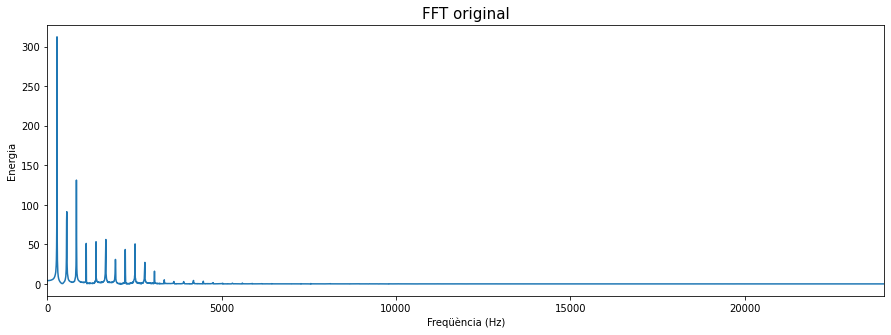

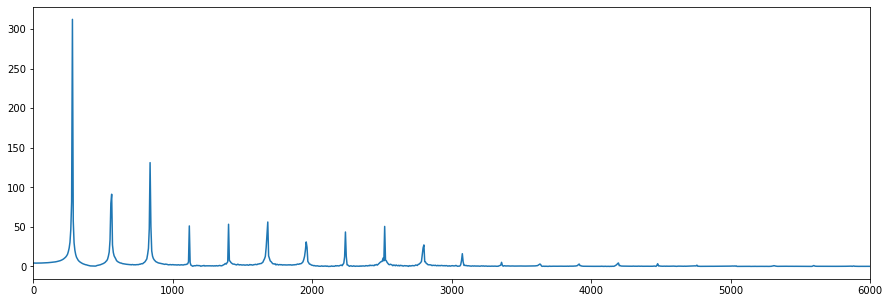

In [50]:
zz,xf = FFTvisualize(x_original[0], Nfft=4096*2, fs=48000, title='FFT original')

fig, (p1) = plt.subplots(1, figsize=(15,5))

p1.plot(xf, zz)
p1.set_xlim(00,6000)

RESPOSTA:

Es pot veure que l'harmònic fonamental té la freqüència esperada de 278.5 Hz aproximadament. Cada pic que es pot veure en el plot és un harmònic diferent del fonamental. Ho podem confirmar perquè tots tenen una freqüència múltiple de la primera. Si ens fixem en l'amplitud, es veu clarament que va disminuïnt a mesura que augmenta la freqüència, però no acaba de seguir un patró determinat (com ara que disminueixi l'energia a la meitat cada vegada).

<div class="alert alert-block alert-success">

__c) Crea una funció `synth(f0)` que generi una senyal amb característiques semblants al senyal que acabes d'analitzar (el so de Freesound).__ 

Recorda que pots utilitzar la funció `singen()` de la pràctica anterior per sintetitzar les components sinusoïdals. La funció ha de rebre un únic paràmetre: la freqüència fonamental del so, $f_0$, en Hz.
    
<br>
    
__c) Create a `synth(f0)` function that generates a signal with similar characteristics to the signal you just analyzed (the Freesound sound).__

Remember that you can use the `singen()` function from the previous lab to synthesize the sinusoidal components. The function must receive a single parameter: the fundamental frequency of the sound, $f_0$, in Hz.

</div>

_Nota: en aquest apartat es tracta que intenteu sintetitzar un so semblant a l'original. Per fer-ho, necessitareu generar un senyal complex (amb harmònics) on cada component tingui una freqüència i una amplitud que segueixi, aproximadament, les relacions entre els valors que heu trobat a l'anàlisi de l'apartat anterior. Per exemple: Si heu trobat que la fonamental té freqüència 220 i l'energia de l'espectre és X, i el primer harmònic és 440 amb un 75% de l'energia del primer, haureu de reflectir això quan decidiu l'amplitud de cada component en la síntesi._


_[ENG] Note: this exercise it is about trying to synthesize a sound similar to the original. To do this, you will need to generate a complex signal (with harmonics) where each component has a frequency and an amplitude that roughly follows the relationships between the values you found in the analysis in the previous section. For example: If you found that the fundamental has frequency 220 and the energy of the spectrum is X, and the first harmonic is 440 with 75% of the energy of the first, you should reflect this when deciding the amplitude of each component in the synthesis._


In [51]:
def synth(f0,dur):
  fs = 44100 # Sampling rate
  phi = 0
  t = np.arange(0,dur,1/fs)

  #0
  A = 0.9
  y = singen(t,f0,A,phi)

  #1
  A = 0.25
  f = 2 * f0
  y += singen(t,f,A,phi)

  #2
  A = 0.4
  f = 3 * f0
  y += singen(t,f,A,phi)

  #3
  A = 0.2
  f = 4 * f0
  y += singen(t,f,A,phi)

  #4
  A = 0.2
  f = 5 * f0
  y += singen(t,f,A,phi)

  #5
  A = 0.2
  f = 6 * f0
  y += singen(t,f,A,phi)

  #6
  A = 0.1
  f = 7 * f0
  y += singen(t,f,A,phi)

  #7
  A = 0.2
  f = 8 * f0
  y += singen(t,f,A,phi)

  #8
  A = 0.2
  f = 9 * f0
  y += singen(t,f,A,phi)

  #9
  A = 0.1
  f = 10 * f0
  y += singen(t,f,A,phi)

  #10
  A = 0.05
  f = 11 * f0
  y += singen(t,f,A,phi)

  #11
  A = 0.025
  f = 12 * f0
  y += singen(t,f,A,phi)

  # Últims harmònics de més freqüència amb A similar (quasi nul·la):
  A = 0.0015
  for i in range (13, 21):
    f = i * f0 # Actualització de la freqüència
    y += singen(t,f,A,phi)
  return y

COMENTARI:

Com que les amplituds dels harmònics no seguien un patró determinat, hem intentat posar l'amplitud individualment per cada harmònic. D'altra banda, hem cregut adequat afegir la durada del senyal com a paràmetre per poder generar la melodia del final.

<div class="alert alert-block alert-success">

__d) Guarda en un arxiu el senyal generat amb la funció per una $f_0$ igual a la del so original. Compara el so sintetitzat amb el so original. S'assemblen? Per què? I què tenen de diferent?__
 
<br>
    
__[ENG] d) Write in a file the signal generated with the function for a $f_0$ equal to that of the original sound. Compare the synthesized sound with the original sound. Do they look alike? Why? And what's different about them?__

</div>

In [52]:
print('So original:')
ipd.Audio(data=x_original[0], rate=48000)

So original:


In [53]:
x_copy = synth(278.5,2)
print('So recreat:')
ipd.Audio(data=x_copy, rate=44100) # Mateixa sampling rate

So recreat:


COMENTARI:

Encara que els sons siguin molt semblants, es nota la diferència perquè l'original és un saxòfon real i el segon ha estat generat amb la nostra funció. La relació entre les amplituds dels harmònics no acaba de ser la mateixa, a més que no sabem quants harmònics hi ha realment, nosaltres n'hem posat 20. També s'ha de tenir en compte que el contingut inharmònic que pugui tenir un saxòfon, el qual fa que caracteritzi el seu, nosaltres no el posem. És per això que el nostre so és més estàndard i artificial.

<div class="alert alert-block alert-success">

__e) Fes un subplot amb l'espectre del senyal original i del senyal (recorda utilitzar només la primera meitat de l'espectre). Compara-les i explica les diferències que hi veus.__
    
<br>
    
__[ENG] e) Make a subplot with the spectrum of the original signal and the signal (remember to use only the first half of the spectrum). Compare them and explain the differences you see.__

</div>

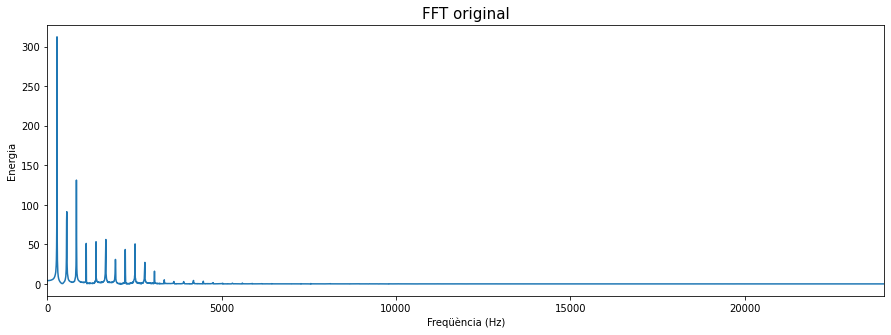

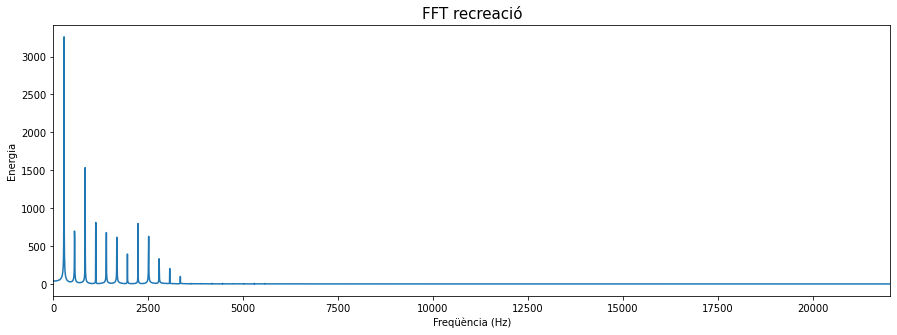

In [54]:
zz,xf = FFTvisualize(x_original[0], Nfft=4096*2, fs=48000, title='FFT original')
zz2,xf2 = FFTvisualize(x_copy, Nfft=4096*2, fs=44100, title='FFT recreació') # Mateixa sampling rate

RESPOSTA:

Generalment, els dos espectres tenen una forma bastant semblant. Hi ha algunes diferències per això:
  - La frequència de sampleig no és la mateixa perquè la del senyal origina era 48000 Hz i nosaltres hem fet servir 44100 Hz.
  - L'escala de l'energia no és la mateixa (3000 > 300) però hem considerat que no era important, perquè no influeix en el resultat.
  - L'amplitud de cada harmònic tampoc coincideix exactament perquè les hem intentat quadrar a ull, bàsicament.

<div class="alert alert-block alert-success">

__f) Canviant el paràmetre d'entrada de la funció que genera el so sintètic, crea una melodia d'almenys 5 notes: crida la funció tantes vegades com notes tingui la melodia, concatena el resultat i, finalment, utilitza `IPython.display.Audio()` per reproduir-la. També pots exportar la melodia com un arxiu d'àudio.__
    
<br>
    
__[ENG] f) By changing the input parameter of the function that generates the synthetic sound, create a melody of at least 5 notes: call the function as many times as the notes you want, concatenate the result, and finally use `IPython.display. Audio()` to play it. You can also export the melody as an audio file.__

</div>

In [55]:
x1 = synth(295,0.25)
x2 = synth(590,0.25)
x3 = synth(442,0.25)
x4 = synth(393.8,0.25)
x5 = synth(787.5,0.25)
x6 = synth(743.3,0.25)
x7 = synth(331.1,0.25)

x8 = synth(295,3)
x9 = synth(371.7,3)
x10 = synth(442,3)

x11 = np.concatenate((x1,x2,x3,x4,x5,x3,x6,x3), axis=None)
x22 = np.concatenate((x7,x2,x3,x4,x5,x3,x6,x3), axis=None)
x33 = np.concatenate((x4,x2,x3,x4,x5,x3,x6,x3), axis=None)
x44 = np.concatenate((x1,x2,x3,x4,x5,x3,x8+x9+x10), axis=None)

x_final = np.concatenate((x11,x11,x22,x22,x33,x33,x11,x44), axis=None)

soundfile.write('sweet.wav', x_final, 44100) # Per guardar el fitxer
ipd.Audio(data=x_final, rate=44100) # Per reproduïr-lo

Output hidden; open in https://colab.research.google.com to view.